<img src="logo.png" align="center" style="width:400px;height=200px">

<center><strong style="font-size: 25px;">Mercedes-Benz Greener Manufacturing</strong></center>


### DESCRIPTION--- Reduce the time a Mercedes-Benz spends on the test bench

### Problem Statement Scenario:
#### Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.
#### To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.
#### You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards

## Performed the below tasks
**Step-1 Understanding the buisness problem/ problem statement**

**Step-2 Getting data (Importing by Pandas)**

**Step-3 Understanding about the data**

**Step-4 Data cleaning**

**Step-5 Data visualization**

**Step-6 EDA Exploratory data analysis**

**Step-7 Feature selection**

**Step-8 Feature Engineering**

**Step-9 Splitting the data**

**Step-10 Model building** 

**Step-11 Prediction and accuracy**

**Step-12 Tunning and improving accuracy**

### **Let's get started!**

### Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Those below are used to change the display options for pandas DataFrames 
# In order to display all the columns or rows of the DataFrame, respectively.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Step-1 Understanding The Buisness Problem/ Problem Statement
### Reduce the time a Mercedes-Benz spends on the test bench

### Step-2 Getting data (Importing Datasets  by Pandas)
#### This involves collecting and obtaining data from various sources that may be relevant to the problem.

In [82]:
# Load the training dataset
train_df = pd.read_csv('Mercedes Benz Train Dataset.csv')

# Load the test dataset
test_df = pd.read_csv('Mercedes Benz Test Dataset.csv')

### Step-3 Understanding about the Data
#### This step involves exploring the data to understand its structure, format, quality, and any patterns or trends that may exist.

In [83]:
Train_Data_shape = train_df.shape

In [84]:
Test_Data_shape=test_df.shape

In [85]:
print('No of Columns and Columns in Train Data {}'.format(Train_Data_shape))
print('No of Columns and Columns in Test Data {}'.format(Test_Data_shape))

No of Columns and Columns in Train Data (4209, 378)
No of Columns and Columns in Test Data (4209, 377)


In [86]:
# Get an overview of the dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None


In [87]:
# Get an overview of the dataset
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB
None


```python
#View the first few rows of the dataset
print(train_df.head())
```

```python
# View the first few rows of the dataset
print(test_df.head())
```

```python
# Calculate summary statistics for the numeric columns
print(train_df.describe())
```

```python
# Calculate summary statistics for the numeric columns
print(test_df.describe())
```

```python
# Count the number of unique values in each column
print(train_df.nunique())
```

```python
# Count the number of unique values in each column
print(test_df.nunique())
```

```python
# Preview 5 random rows
train_df.sample(5)
```

```python
# View summary statistics for the numerical columns
summary_stats = train_df.describe().transpose()
summary_stats
```

### Step-4 Data cleaning: 
#### This involves identifying and correcting errors, missing values, outliers,or other issues in the data that could impact the accuracy of the analysis.

``` python
# Check for missing values
print(train_df.isnull().sum())
```

``` python
# Check for missing values
print(test_df.isnull().sum())
```

In [88]:
# Check for duplicates
print(train_df.duplicated().sum())

0


In [89]:
# Check for duplicates
print(test_df.duplicated().sum())

0


In [90]:
# Both Data sets have not  missing Values no require for process for fillna treatment
# Both Data sets have not Duplicates so no require for process to drop them treatment

In [91]:
# Check the number of rows and columns after cleaning
print('Printing the shape of train dataset: ',train_df.shape)
print('Printing the shape of test dataset: ',test_df.shape)

Printing the shape of train dataset:  (4209, 378)
Printing the shape of test dataset:  (4209, 377)


### Step- 5 Data Visualization:
#### This involves creating visualizations to help understand the relationships between different variables in the data.

#### Check the Distribution of the Target Variable

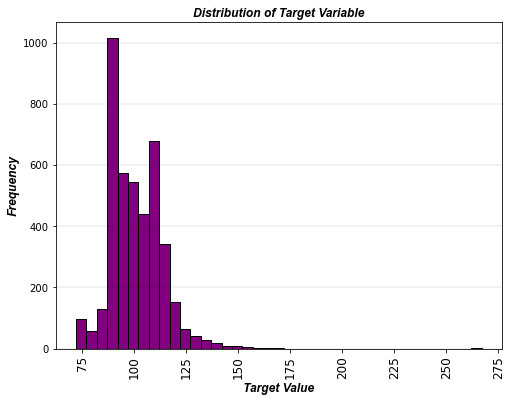

In [92]:
# Define the range of values for the histogram bins
bin_width = 5
bins = np.arange(train_df['y'].min(), train_df['y'].max() + bin_width, bin_width)

# Create a histogram of the target variable with a bin width of 5
font_style = {'family': 'Arial', 'size': 12, 'weight': 'bold', 'style': 'italic'}
plt.figure(figsize=(8,6))
plt.grid(axis='y',ls='solid',color ='k',lw=0.2,alpha=0.5)
plt.hist(train_df['y'], bins=bins, color='purple', edgecolor='black')

# Add labels and a title
plt.xlabel('Target Value',fontdict=font_style)
plt.ylabel('Frequency',fontdict=font_style)
plt.title('Distribution of Target Variable',fontdict=font_style)
plt.xticks(rotation='vertical', ha='center',size=12)

# Display the chart
plt.show()


``` python
# Count the number of occurrences of each unique value in the target column
target_counts = train_df['y'].value_counts()

# Print the distribution of the target variable
print(target_counts)
```

In [93]:
# The top 10 values in the 'target' column
top_targets = train_df['y'].value_counts().head(10)
print(top_targets)

89.06    7
90.76    7
91.88    7
89.38    7
90.44    6
89.19    6
91.62    6
93.62    6
89.60    6
90.38    6
Name: y, dtype: int64


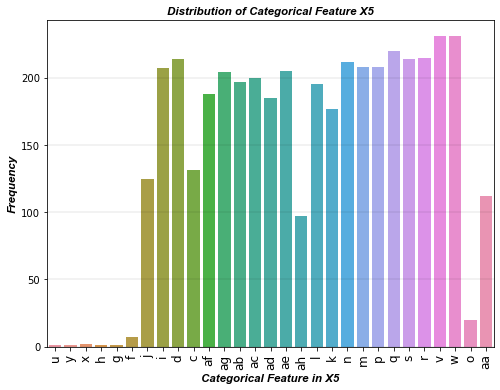

In [94]:
# Define the range of values for the histogram bins
bin_width = 5
bins = np.arange(train_df['y'].min(), train_df['y'].max() + bin_width, bin_width)

# Create a histogram of the target variable with a bin width of 5
font_style = {'family': 'Arial', 'size': 11.5, 'weight': 'bold', 'style': 'italic'}
plt.figure(figsize=(8,6))
plt.grid(axis='y',ls='solid',color ='k',lw=0.2,alpha=0.5)
sns.countplot(x='X5', data=train_df)

# Add labels and a title
plt.xlabel('Categorical Feature in X5',fontdict=font_style)
plt.ylabel('Frequency',fontdict=font_style)
plt.title('Distribution of Categorical Feature X5',fontdict=font_style)
plt.xticks(rotation='vertical', ha='center',size=12)

# Display the chart
plt.show()

### Step-7 Feature Selection: 
#### This involves selecting the most relevant features or variables for the model, based on their importance or impact on the target variable.

In [95]:
# Split the train data into X (features) and y (target variable)
X = train_df.drop('y', axis=1) # Drop the 'y' column to get the feature matrix
y = train_df['y'] # Get the 'y' column as the target variable

# Print the shapes of the resulting X and y matrices
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (4209, 377)
y shape: (4209,)


### Step-8 Feature Engineering:
#### This involves creating new features or variables from the existing data to improve the performance of the model

In [96]:
# Select the categorical columns in X and test_df
cat_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

# Perform one-hot encoding using get_dummies() on X
X_encoded = pd.get_dummies(X[cat_cols], prefix=cat_cols)

# Perform one-hot encoding using get_dummies() on test_df
test_encoded = pd.get_dummies(test_df[cat_cols], prefix=cat_cols)

# Align the columns of the encoded test_df with X_encoded
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Concatenate the encoded categorical columns with the numerical columns in X and test_df
X_encoded = pd.concat([X.drop(cat_cols, axis=1), X_encoded], axis=1)
test_encoded = pd.concat([test_df.drop(cat_cols, axis=1), test_encoded], axis=1)


In [97]:
X_encoded.shape

(4209, 564)

In [98]:
test_encoded.shape

(4209, 564)

In [99]:
# Define a threshold for variance
var_threshold = 0.02

# Get the low-variance columns in X_encoded
low_var_cols_X = X_encoded.columns[X_encoded.var() < var_threshold]

# Get the low-variance columns in test_encoded
low_var_cols_test = test_encoded.columns[test_encoded.var() < var_threshold]

# Combine the low-variance columns from both data frames
low_var_cols = set(low_var_cols_X).union(set(low_var_cols_test))

# Drop the low-variance columns from both X_encoded and test_encoded
X_encoded = X_encoded.drop(low_var_cols, axis=1)
test_encoded = test_encoded.drop(low_var_cols, axis=1)

# Reindex the columns of test_encoded to match X_encoded
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)


In [100]:
X_encoded.shape

(4209, 278)

In [101]:
test_encoded.shape

(4209, 278)

### Step-9 Splitting the Data: 
#### This involves dividing the data into training and testing sets to build and evaluate the model.

In [102]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Step-10 Model building: 
#### This involves selecting and building the appropriate machine learning algorithm to solve the problem.

In [103]:
import xgboost as xgb

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define the XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# Make predictions on the validation data
y_pred = bst.predict(dval)

# Compute the mean squared error of the predictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Compute the R-squared score of the predictions
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print("R-squared Score: {:.2f}".format(r2))


Mean Squared Error: 69.05
R-squared Score: 0.56


### Step -11 Prediction and Accuracy: 
#### This involves using the model to make predictions on new data and evaluating the accuracy of the predictions.

In [104]:
# Compute the mean squared error of the predictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Compute the R-squared score of the predictions
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print("R-squared Score: {:.2f}".format(r2))


Mean Squared Error: 69.05
R-squared Score: 0.56


In [105]:
# Convert the test data to DMatrix format for XGBoost
dtest = xgb.DMatrix(test_encoded)

# Make predictions on the test data
test_pred = bst.predict(dtest)


In [106]:
test_pred

array([ 84.31303, 101.71944,  79.36254, ...,  92.54475, 108.79264,
        90.6403 ], dtype=float32)

### Step-12 Tuning or Improving accuracy with Hyper Parameter: 
#### This involves fine-tuning the model parameters and features to improve its accuracy and performance.

In [107]:
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#import pandas as pd
# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [108]:
# Define the XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Set up a grid of hyperparameters to search over
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [109]:
# Use grid search to find the best combination of hyperparameters
grid = GridSearchCV(estimator=xgb.XGBRegressor(**params, n_estimators=100),
                    param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                   

In [110]:
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}


In [111]:
# Train the XGBoost model with the best hyperparameters
bst = xgb.train({**params, **grid.best_params_}, dtrain, num_boost_round=1000, early_stopping_rounds=10, evals=[(dval, "Validation")], verbose_eval=10)


[0]	Validation-rmse:90.90506
[10]	Validation-rmse:32.73596
[20]	Validation-rmse:13.70571
[30]	Validation-rmse:8.84063
[40]	Validation-rmse:8.05297
[50]	Validation-rmse:7.95711
[60]	Validation-rmse:7.95853
[64]	Validation-rmse:7.95577


In [112]:
# Make predictions on the validation data
y_pred = bst.predict(dval)

In [113]:

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Compute the R-squared score of the predictions
r2 = r2_score(y_val, y_pred)
print("R-squared Score: {:.2f}".format(r2))

Mean Squared Error: 63.33
R-squared Score: 0.59


In [114]:
# tunning some parameter

In [115]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train multiple XGBoost models with different random seeds
num_models = 5
models = []
for i in range(num_models):
    # Set a different random seed for each model
    params['seed'] = i
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    model = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=10, evals=[(dval, "Validation")], verbose_eval=10)
    models.append(model)

# Make predictions on the validation data for each model
y_preds = []
for model in models:
    y_pred = model.predict(dval)
    y_preds.append(y_pred)

# Compute the average of the predictions
y_pred_avg = sum(y_preds) / len(y_preds)


print('----------------------------------------------')
print('Checking Accuracy With Mean Squared Error')
print('----------------------------------------------')

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_val, y_pred_avg)
print("Mean Squared Error: {:.2f}".format(mse))

# Compute the R-squared score of the predictions
r2 = r2_score(y_val, y_pred_avg)
print("R-squared Score: {:.2f}".format(r2))


[0]	Validation-rmse:90.90506
[10]	Validation-rmse:32.73596
[20]	Validation-rmse:13.70571
[30]	Validation-rmse:8.84063
[40]	Validation-rmse:8.05297
[50]	Validation-rmse:7.95711
[60]	Validation-rmse:7.95853
[65]	Validation-rmse:7.95785
[0]	Validation-rmse:90.89904
[10]	Validation-rmse:32.74000
[20]	Validation-rmse:13.71245
[30]	Validation-rmse:8.84206
[40]	Validation-rmse:8.03868
[50]	Validation-rmse:8.01410
[57]	Validation-rmse:8.00205
[0]	Validation-rmse:90.90338
[10]	Validation-rmse:32.71626
[20]	Validation-rmse:13.70049
[30]	Validation-rmse:8.83606
[40]	Validation-rmse:8.03750
[50]	Validation-rmse:7.94920
[60]	Validation-rmse:7.93014
[69]	Validation-rmse:7.92594
[0]	Validation-rmse:90.89649
[10]	Validation-rmse:32.73712
[20]	Validation-rmse:13.71701
[30]	Validation-rmse:8.84973
[40]	Validation-rmse:7.99047
[50]	Validation-rmse:7.88348
[60]	Validation-rmse:7.84850
[65]	Validation-rmse:7.86091
[0]	Validation-rmse:90.88951
[10]	Validation-rmse:32.73458
[20]	Validation-rmse:13.69019
[30]

In [116]:
# Compute the mean squared error of the predictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Compute the R-squared score of the predictions
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print("R-squared Score: {:.2f}".format(r2))

Mean Squared Error: 62.44
R-squared Score: 0.60


In [117]:
# Convert the data to DMatrix format for XGBoost
dtest = xgb.DMatrix(test_encoded)

# Make predictions on the test data
y_pred = bst.predict(dtest)

# Print the predictions
print(y_pred)


[ 86.45085   99.64463   79.16368  ...  90.753555 109.322945  89.94686 ]


In [118]:
# Convert the test data to DMatrix format for XGBoost
dtest = xgb.DMatrix(test_encoded)

# Make predictions on the test data
y_pred = bst.predict(dtest)

# Create a submission dataframe with the predicted values
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'y': y_pred
})

# Save the submission dataframe to a CSV file
submission.to_csv('submission.csv', index=False)

In [119]:
submission= pd.read_csv('submission.csv')

In [120]:
submission.head()

,ID,y
0,1,86.45085
1,2,99.64463
2,3,79.16368
3,4,78.32559
4,5,112.01158


### Plot the distribution of the predicted target variable in the submission data

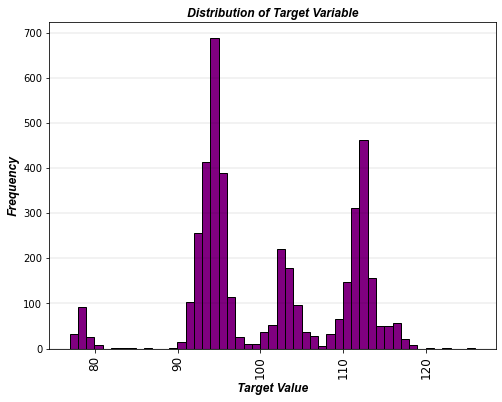

In [121]:
# Define the range of values for the histogram bins
bin_width = 1
bins = np.arange(submission['y'].min(), submission['y'].max() + bin_width, bin_width)

# Create a histogram of the target variable with a bin width of 5
font_style = {'family': 'Arial', 'size': 12, 'weight': 'bold', 'style': 'italic'}
plt.figure(figsize=(8,6))
plt.grid(axis='y',ls='solid',color ='k',lw=0.2,alpha=0.5)
plt.hist(submission['y'], bins=bins, color='purple', edgecolor='black')

# Add labels and a title
plt.xlabel('Target Value',fontdict=font_style)
plt.ylabel('Frequency',fontdict=font_style)
plt.title('Distribution of Target Variable',fontdict=font_style)
plt.xticks(rotation='vertical', ha='center',size=12)

# Display the chart
plt.show()

### Plot the distribution of the target variable in the training data

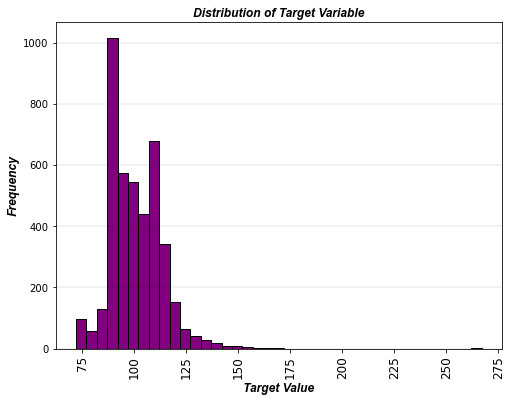

In [122]:
# Define the range of values for the histogram bins
bin_width = 5
bins = np.arange(train_df['y'].min(), train_df['y'].max() + bin_width, bin_width)

# Create a histogram of the target variable with a bin width of 5
font_style = {'family': 'Arial', 'size': 12, 'weight': 'bold', 'style': 'italic'}
plt.figure(figsize=(8,6))
plt.grid(axis='y',ls='solid',color ='k',lw=0.2,alpha=0.5)
plt.hist(train_df['y'], bins=bins, color='purple', edgecolor='black')

# Add labels and a title
plt.xlabel('Target Value',fontdict=font_style)
plt.ylabel('Frequency',fontdict=font_style)
plt.title('Distribution of Target Variable',fontdict=font_style)
plt.xticks(rotation='vertical', ha='center',size=12)

# Display the chart
plt.show()


## conclusions

#### Based on the predicted values of the target variable for the test data, we can draw conclusions about the time a Mercedes-Benz spends on the test bench.

#### Assuming the model is accurate, we can use the predicted values to estimate the time a Mercedes-Benz spends on the test bench for a new dataset. The lower the predicted value, the lower the time the car will spend on the test bench. This information can be useful for optimizing the manufacturing process and reducing the testing time, which in turn can reduce the cost of production.

#### However, it is important to note that the accuracy of the model's predictions should be validated before making any decisions based on them. This can be done by comparing the model's predictions with actual data from the manufacturing process. If there is a significant difference between the predicted and actual values, further analysis and model refinement may be necessary.